In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from metropolis import metropolis
from spin_lattice import generate_spin_lattice
from plots import plot_energy_vs_iters, plot_magnetization_vs_temp

## Lattice Vizualization

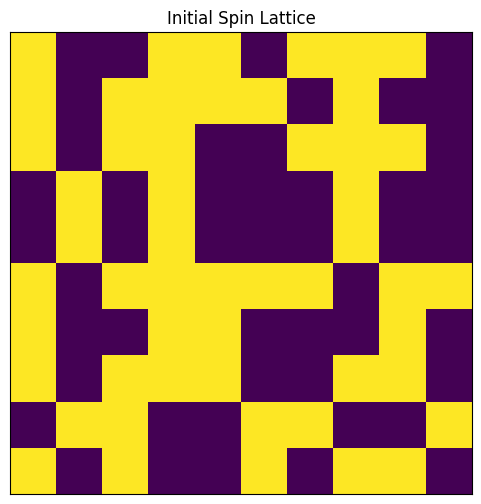

In [ ]:
N = 10
lattice = np.random.choice([1, -1], size=(N, N))

cmap = plt.get_cmap('viridis')

plt.figure(figsize=(6, 6))
plt.imshow(lattice, cmap=cmap, interpolation='none', vmin=-1, vmax=1)
plt.title("Initial Spin Lattice")
# plt.colorbar(label="Spin Value")
plt.xticks([])  # remove x ticks
plt.yticks([])  # remove y ticks
plt.grid(True)
plt.show()

## Metropolis Algorithm Convergence with varying parameters

### Energy convergence with varying J

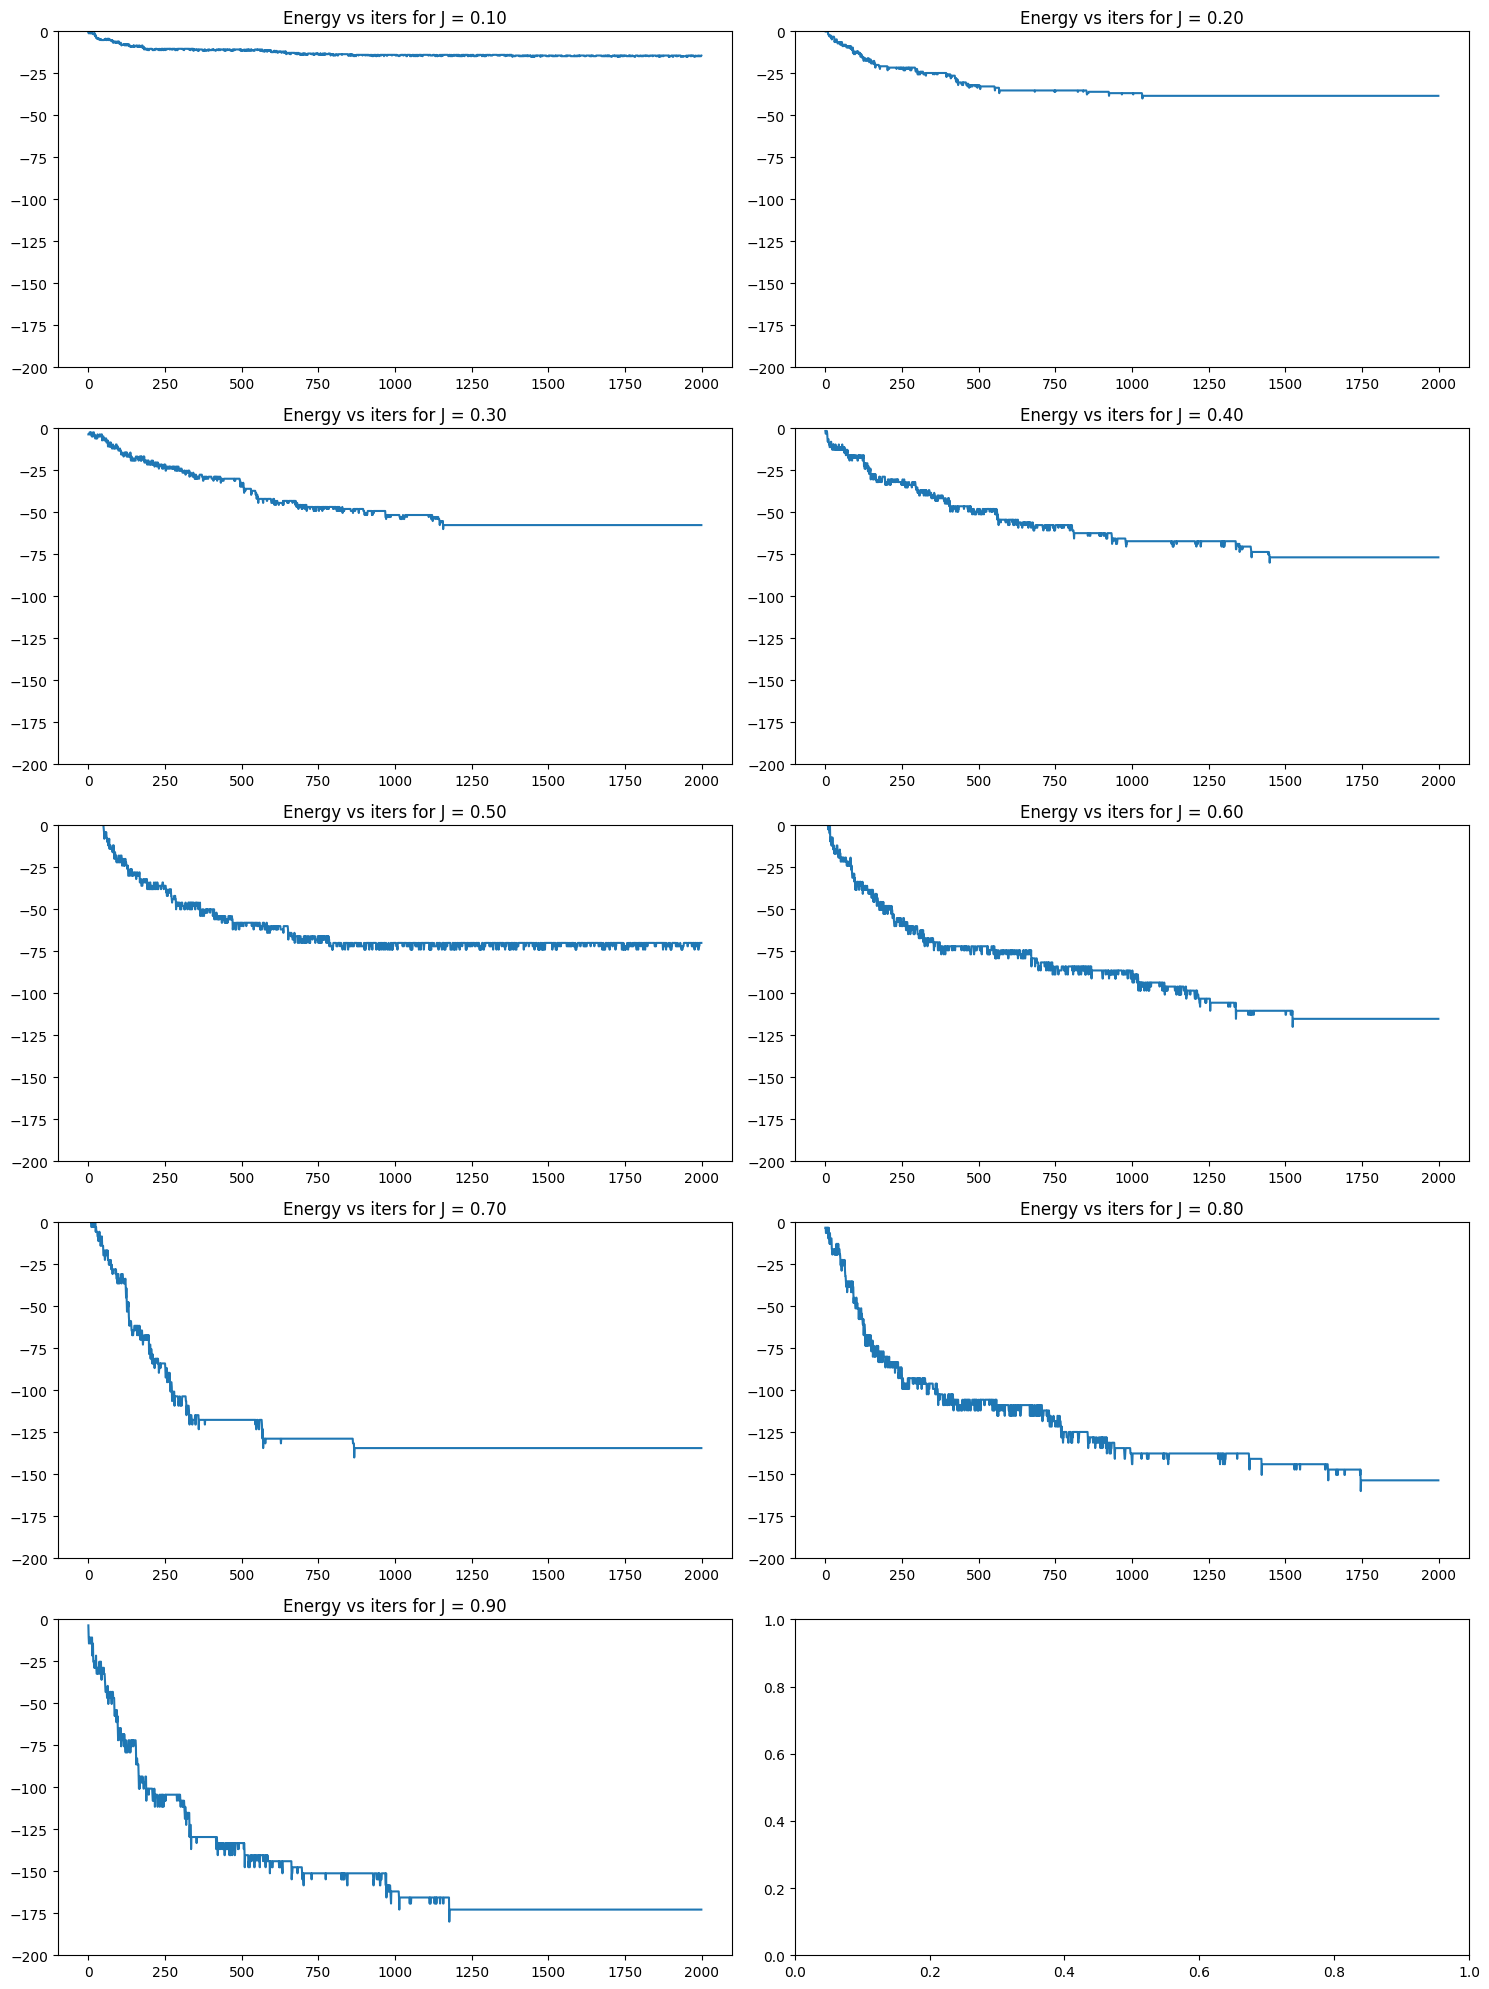

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
K = 0.1
T = 0.1
J = np.linspace(0.1, 0.9, 9)
iters = 2000

fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 9 subplots, so 5x2 grid
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for id, j in enumerate(J):
    spin_lattice = generate_spin_lattice(N)  # Reset for each J
    final_spin_lattice, spin_lattice_energy = metropolis(N, spin_lattice, K, T, j, iters)
    axes[id].plot(range(iters), spin_lattice_energy)
    axes[id].set_title(f'Energy vs iters for J = {j:.2f}')
    axes[id].set_ylim(bottom=-200, top=0)

plt.tight_layout()
plt.savefig("plots/energy_vs_iters_all_J.png")
plt.show()

### Energy convergence with varying K_B * T

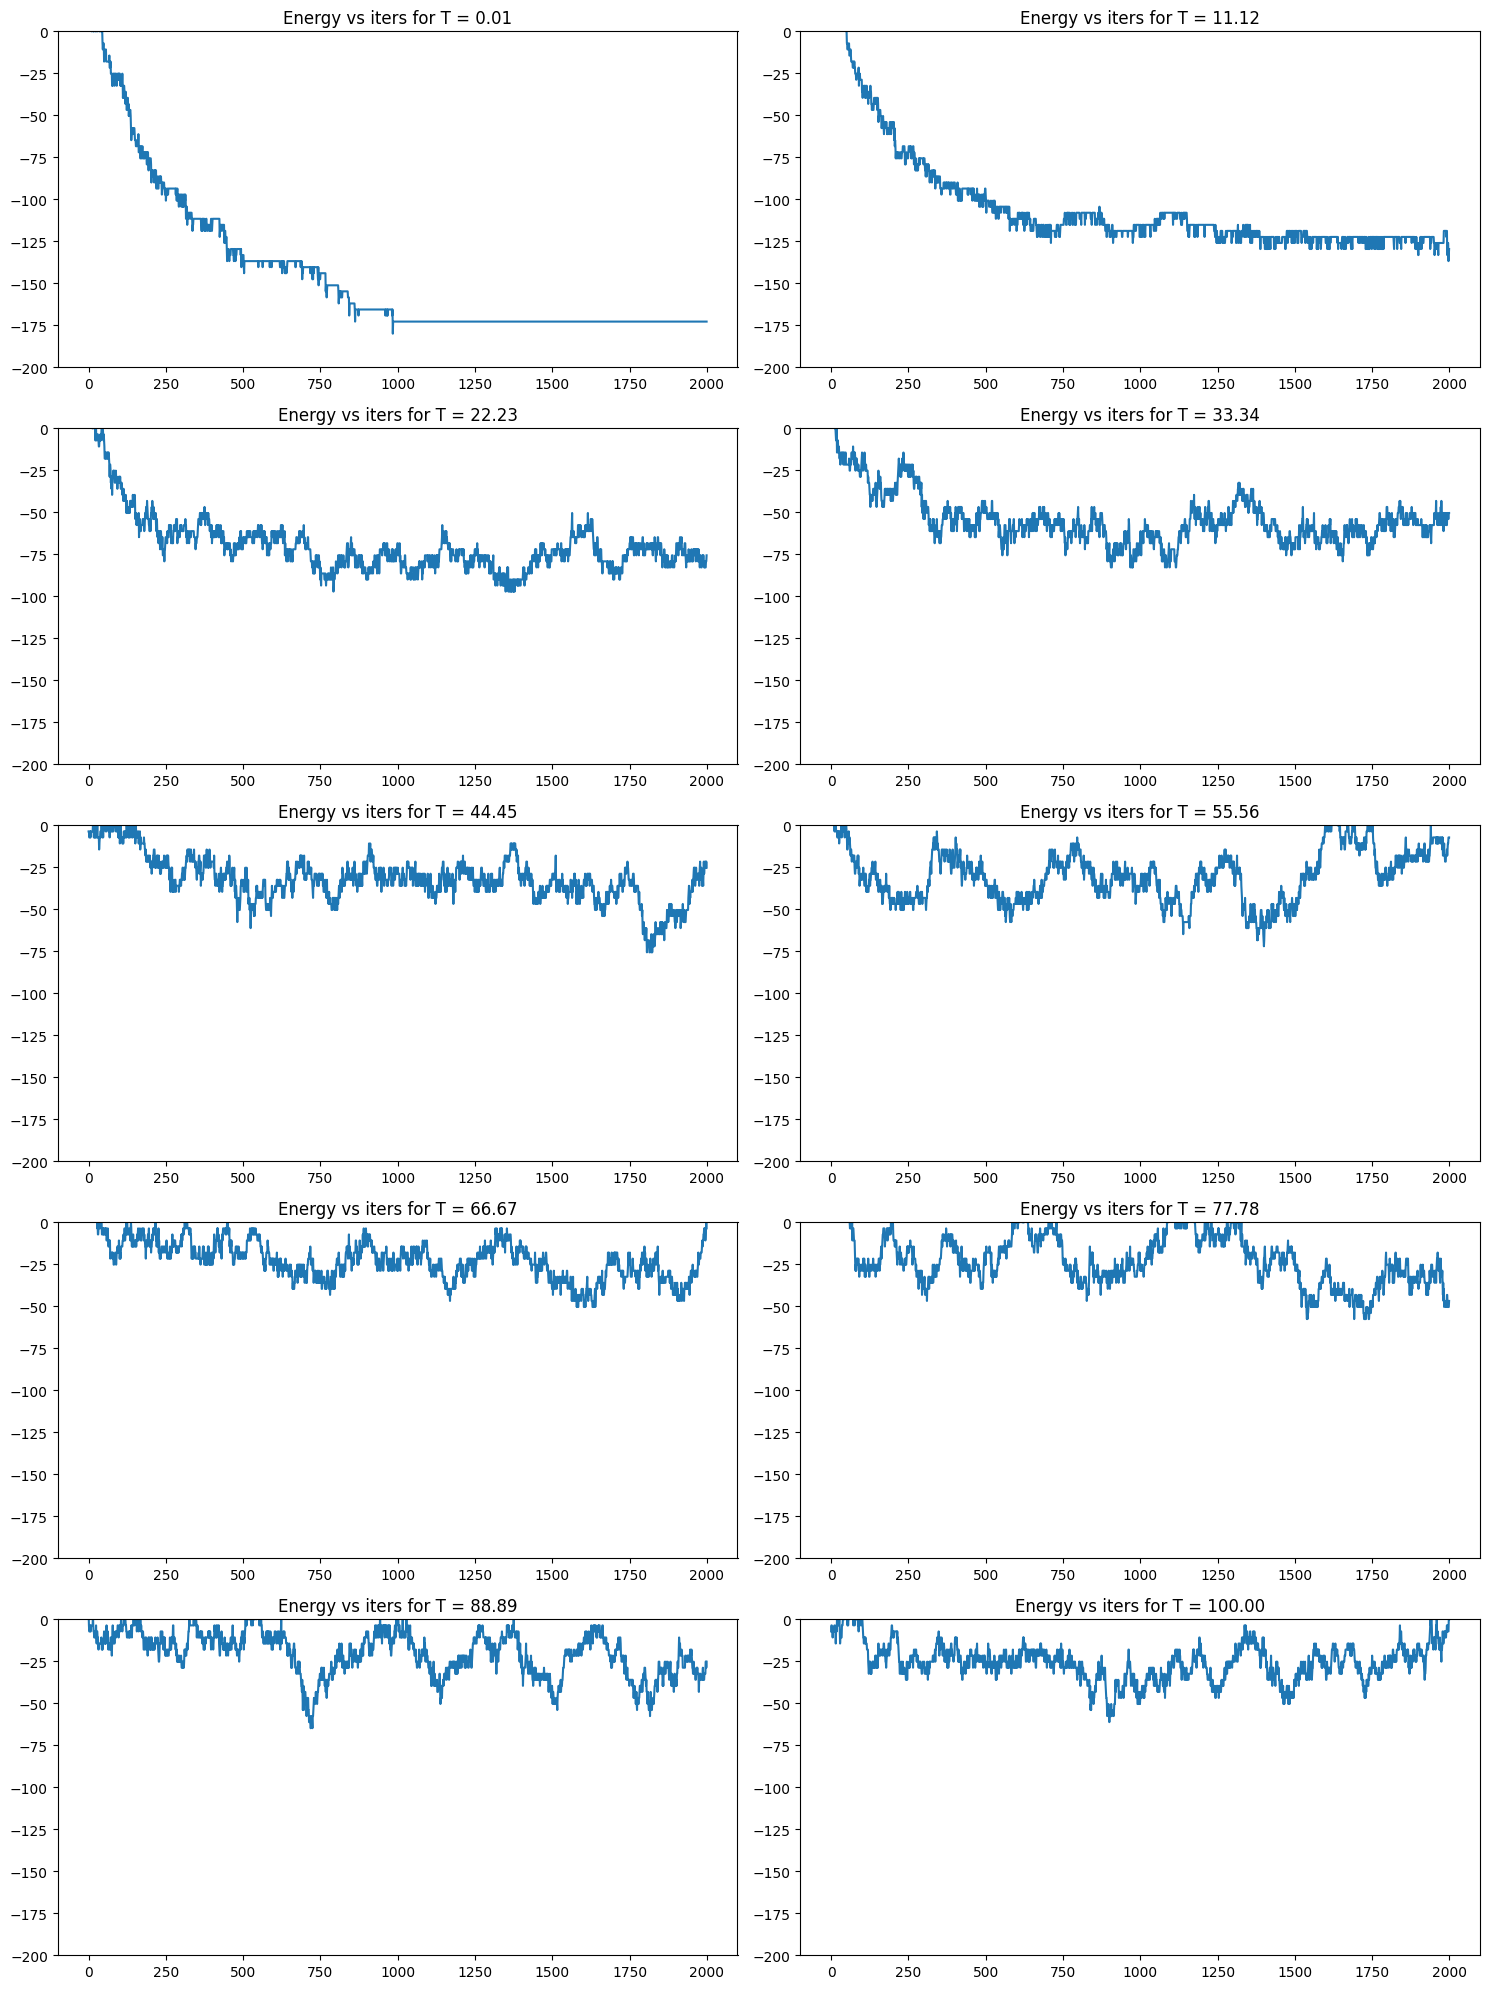

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
K = 0.1
T = np.linspace(0.01, 100, 10)
J = 0.5
iters = 2000

fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 9 subplots, so 5x2 grid
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for id, t in enumerate(T):
    spin_lattice = generate_spin_lattice(N)  # Reset for each J
    final_spin_lattice, spin_lattice_energy = metropolis(N, spin_lattice, K, t, j, iters)
    axes[id].plot(range(iters), spin_lattice_energy)
    axes[id].set_title(f'Energy vs iters for T = {t:.2f}')
    axes[id].set_ylim(bottom=-200, top=0)

plt.tight_layout()
plt.savefig("plots/energy_vs_iters_all_T.png")
plt.show()

## Magnetization calculation

In [46]:
from tqdm import tqdm
from observables import lattice_magnetization

N = 10
K = 0.1
T = np.linspace(0.01, 1000, 200)
J = 0.5
iters = 2000

magnetization = []
lattices = []
for t in tqdm(T):
    spin_lattice = generate_spin_lattice(N)
    final_spin_lattice, spin_lattice_energies = metropolis(N, spin_lattice, K, t, J, iters)
    mag = lattice_magnetization(final_spin_lattice)
    magnetization.append(mag)
    lattices.append(final_spin_lattice)
    

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\anand\Desktop\Spin-lattice-metropolis\observables.py:13: RuntimeWarning: overflow encountered in exp
  return np.exp( -(energy) / (k * T))
100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


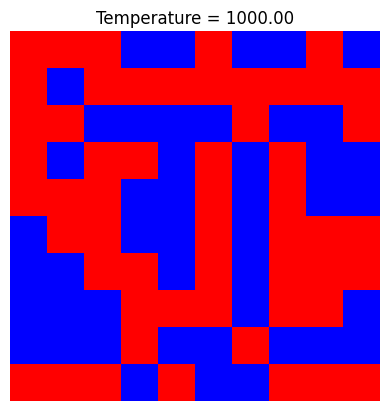

In [47]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
img = ax.imshow(lattices[0], cmap='bwr', vmin=-1, vmax=1)
title = ax.set_title(f"Temperature = {T[0]:.2f}")
ax.axis('off')

def update(frame):
    img.set_data(lattices[frame])
    title.set_text(f"Temperature = {T[frame]:.2f}")
    return [img, title]

ani = animation.FuncAnimation(  
    fig, update, frames=len(lattices), interval=150, blit=True)
ani.save("animations/spin_lattice_heating_3.gif", writer="pillow")

plt.show()

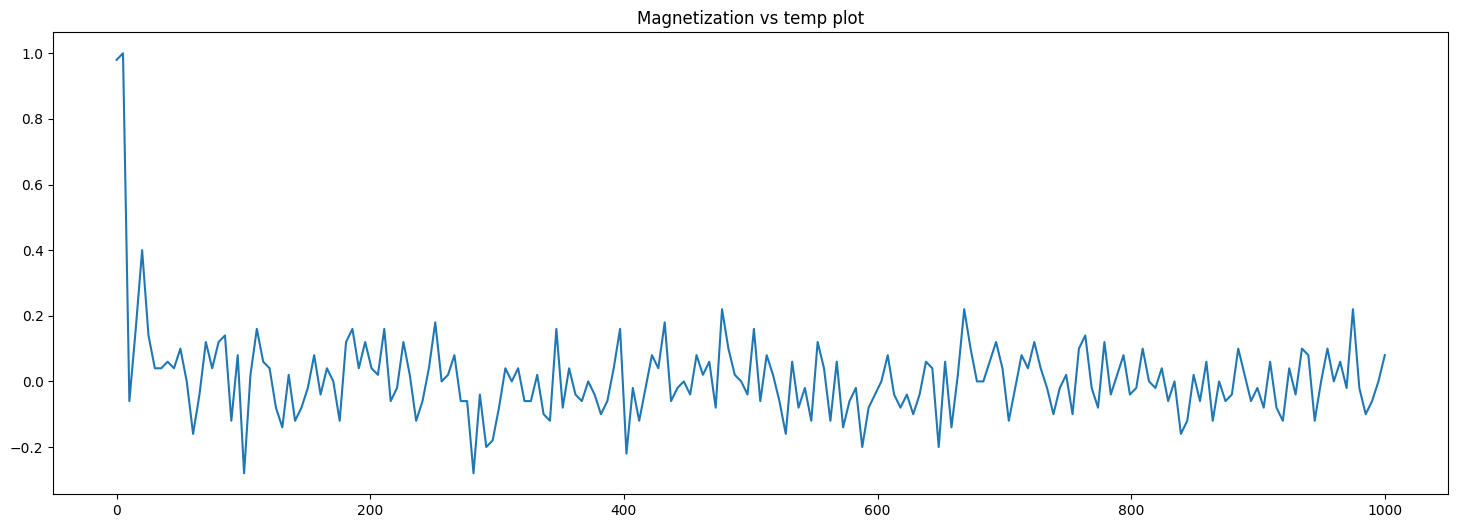

In [48]:
plot_magnetization_vs_temp(magnetization, T)